In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2020-11-29T17:00:00,12,Lazio,3358,355,3713,85999,89712,450,1993,...,19.0,22913.0,17511.0,445.0,9.56,4.14,8.70,11.38,-0.28,0.50
279,2020-11-30T17:00:00,12,Lazio,3384,350,3734,86467,90201,489,1589,...,39.0,20008.0,15023.0,468.0,9.37,4.14,7.94,10.58,-1.41,0.55
280,2020-12-01T17:00:00,12,Lazio,3241,352,3593,87345,90938,737,1669,...,64.0,26784.0,24538.0,878.0,9.80,3.95,6.23,6.80,0.57,0.82
281,2020-12-02T17:00:00,12,Lazio,3282,350,3632,88272,91904,966,1791,...,45.0,24689.0,19646.0,927.0,9.64,3.95,7.25,9.12,-0.57,1.06


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 3, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1769
Nuovi tamponi: 22793.0
Percentuale nuovi positivi/nuovi tamponi: 7.8 %
Nuovi guariti: 756.0
Nuovi deceduti: 38.0
Variazione positivi ricoverati con sintomi: -49.0
Variazione positivi in terapia intensiva: 14.0
Variazione positivi in isolamento dimiciliare: 1010.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 3, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-04T17:00:00,12,Lazio,737,48,785,7148,7933,208,244,...,6.0,11737.0,9039.0,181.0,6.11,9.90,2.08,2.70,2.13,2.69
1,2020-10-05T17:00:00,12,Lazio,764,48,812,7330,8142,209,248,...,5.0,11402.0,9099.0,182.0,5.91,9.97,2.18,2.73,0.00,2.63
2,2020-10-06T17:00:00,12,Lazio,774,44,818,7472,8290,148,275,...,4.0,10855.0,8727.0,142.0,5.38,9.87,2.53,3.15,-8.33,1.82
3,2020-10-07T17:00:00,12,Lazio,808,48,856,7724,8580,290,357,...,6.0,11908.0,8683.0,252.0,5.61,9.98,3.00,4.11,9.09,3.50
4,2020-10-08T17:00:00,12,Lazio,821,55,876,7976,8852,272,359,...,6.0,13333.0,9674.0,252.0,6.28,9.90,2.69,3.71,14.58,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-29T17:00:00,12,Lazio,3358,355,3713,85999,89712,450,1993,...,19.0,22913.0,17511.0,445.0,9.56,4.14,8.70,11.38,-0.28,0.50
57,2020-11-30T17:00:00,12,Lazio,3384,350,3734,86467,90201,489,1589,...,39.0,20008.0,15023.0,468.0,9.37,4.14,7.94,10.58,-1.41,0.55
58,2020-12-01T17:00:00,12,Lazio,3241,352,3593,87345,90938,737,1669,...,64.0,26784.0,24538.0,878.0,9.80,3.95,6.23,6.80,0.57,0.82
59,2020-12-02T17:00:00,12,Lazio,3282,350,3632,88272,91904,966,1791,...,45.0,24689.0,19646.0,927.0,9.64,3.95,7.25,9.12,-0.57,1.06


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

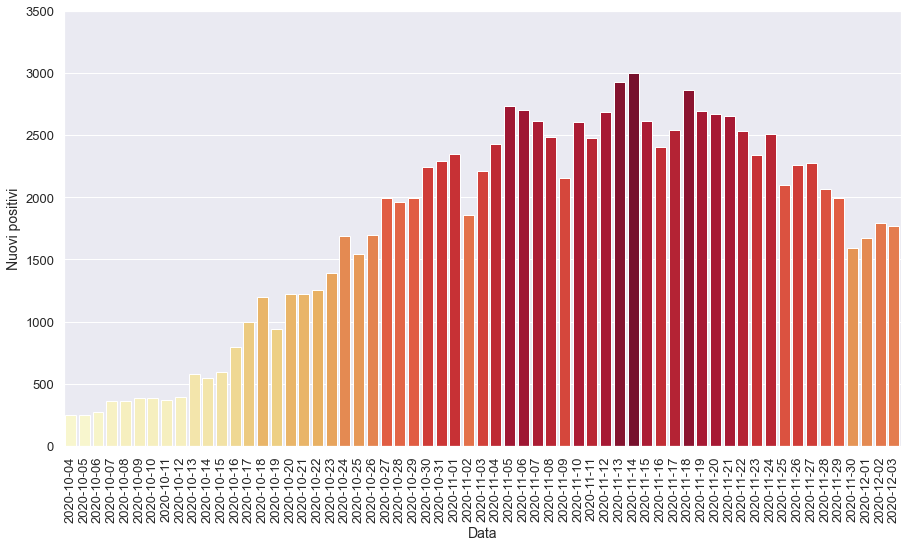

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

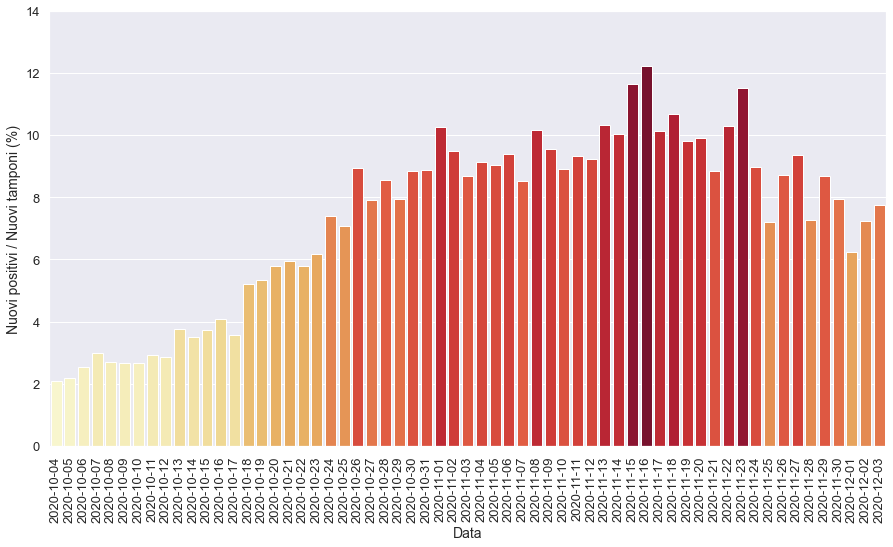

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

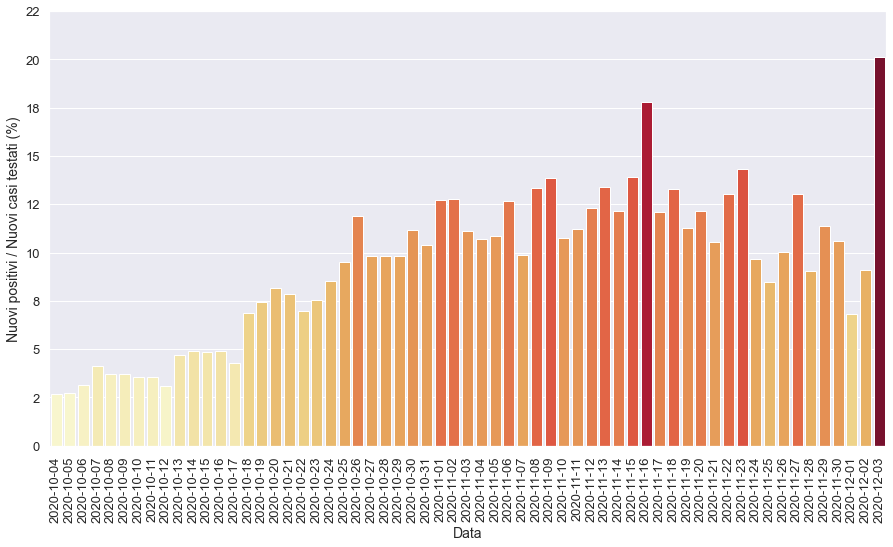

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

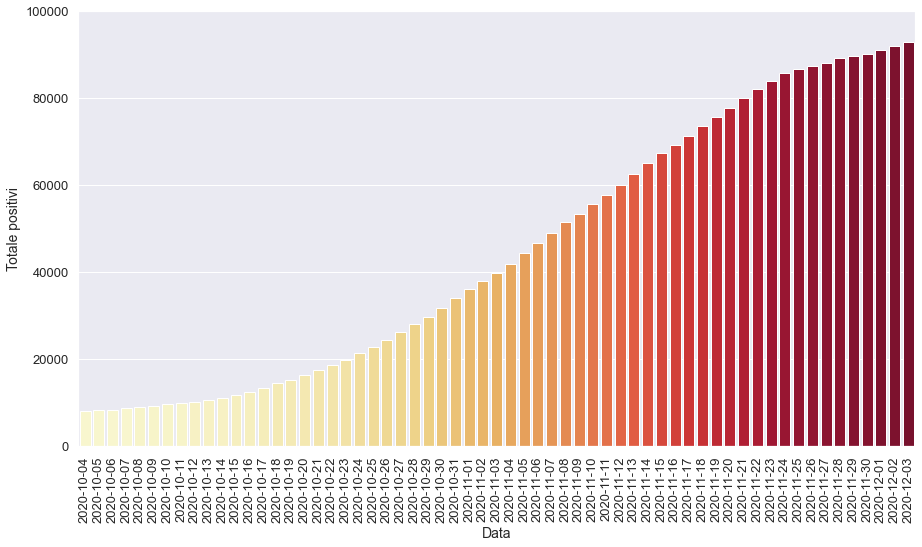

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

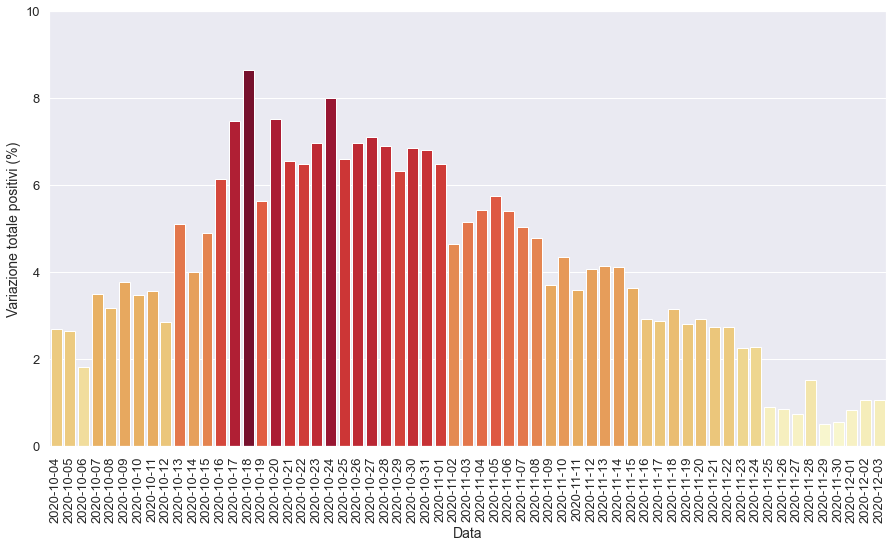

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

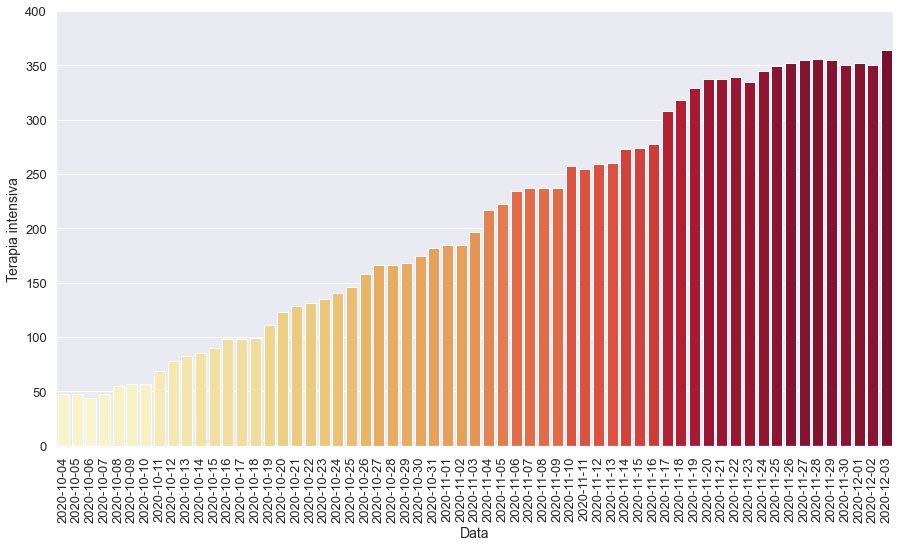

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

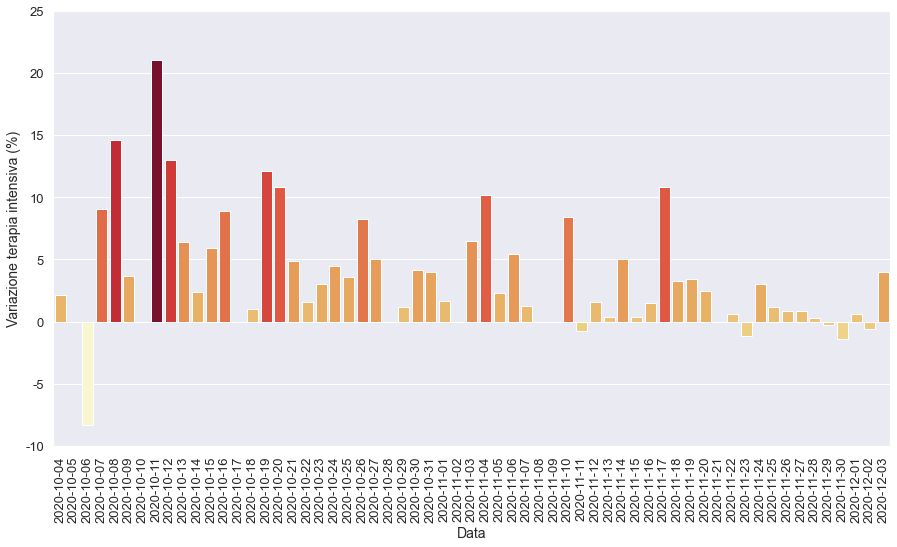

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

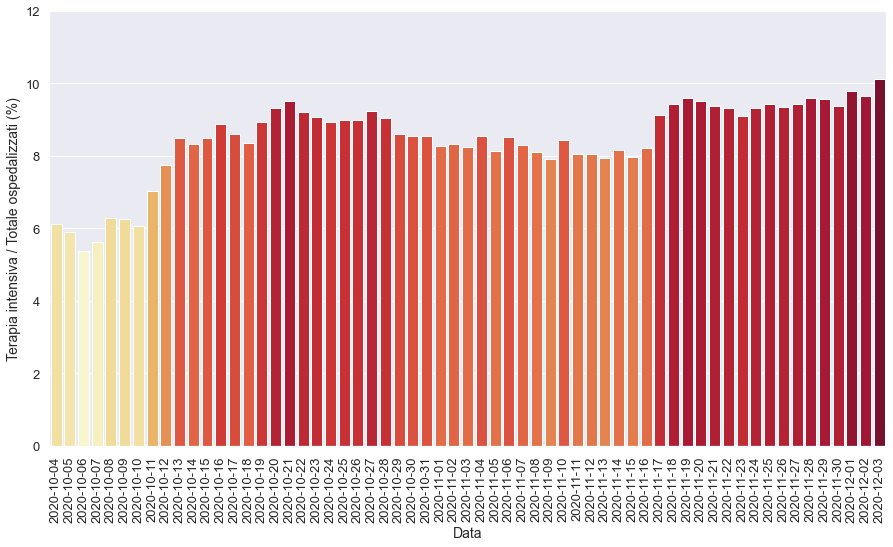

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

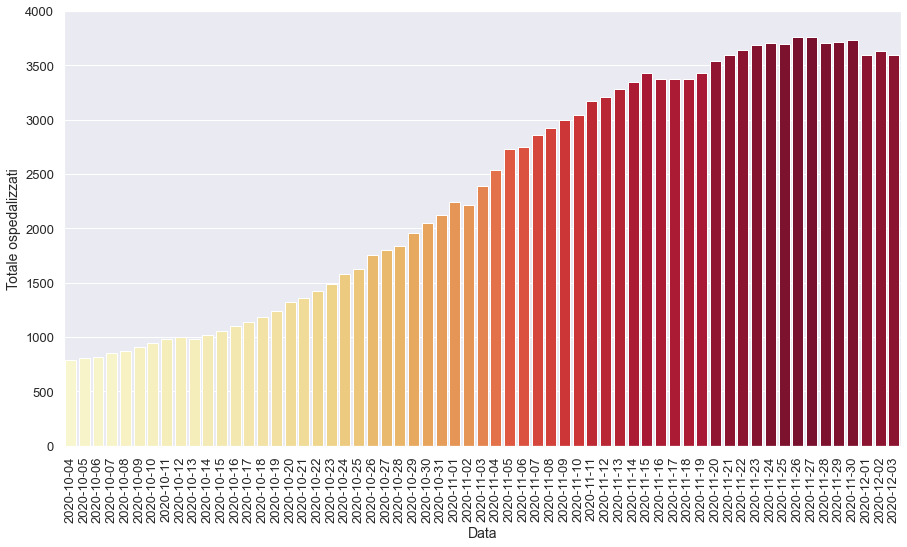

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

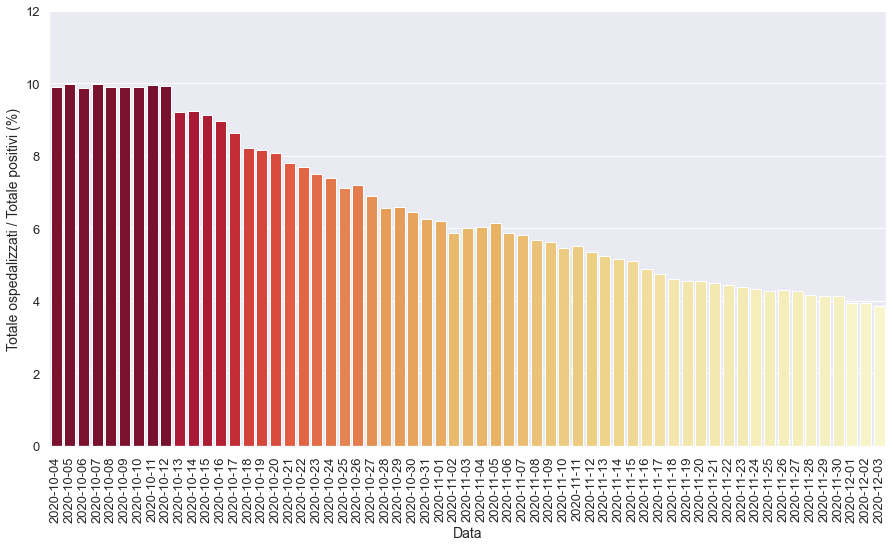

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

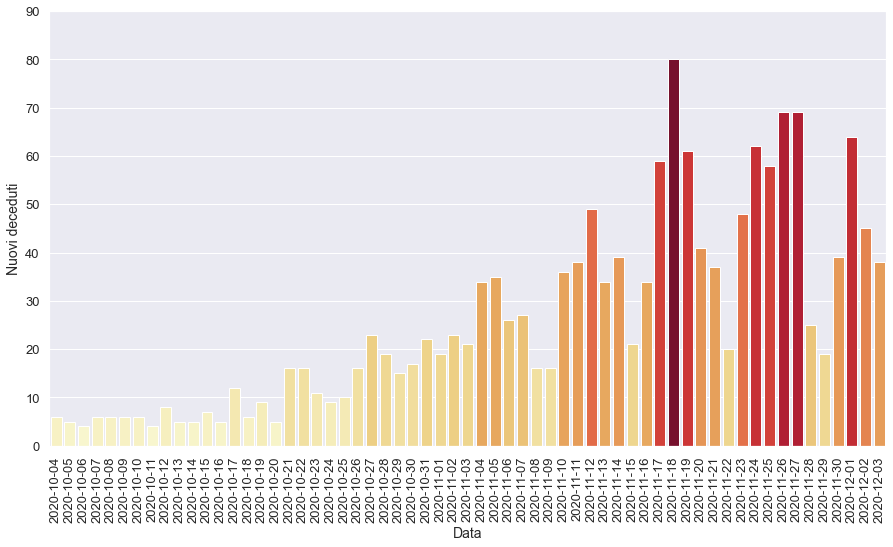

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

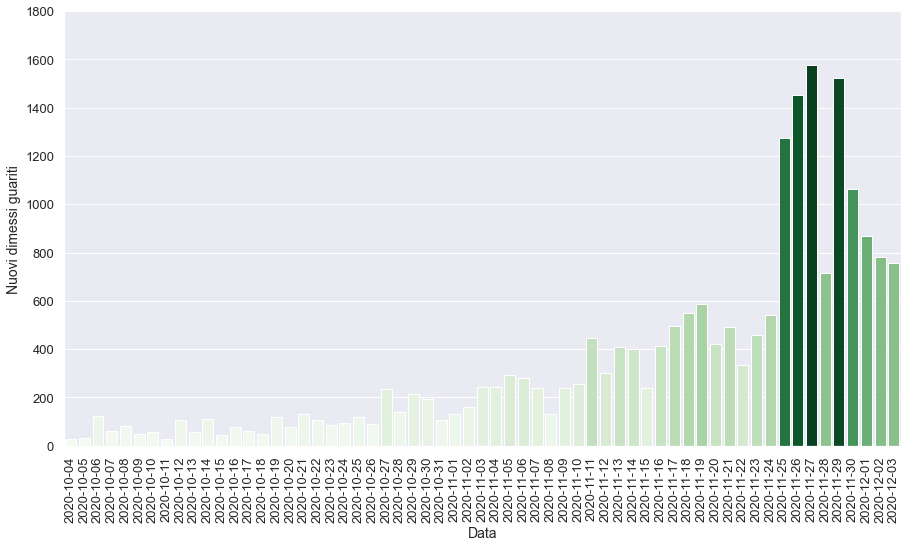

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,12,Lazio,2192,197,2389,37340,39729,1946,2209,...,21.0,25481.0,19915.0,1774.0,8.25,6.01,8.67,11.09,6.49,5.15
1,2020-11-04T17:00:00,12,Lazio,2317,217,2534,39349,41883,2154,2432,...,34.0,26612.0,22691.0,2009.0,8.56,6.05,9.14,10.72,10.15,5.42
2,2020-11-05T17:00:00,12,Lazio,2508,222,2730,41560,44290,2407,2735,...,35.0,30283.0,25138.0,2211.0,8.13,6.16,9.03,10.88,2.30,5.75
3,2020-11-06T17:00:00,12,Lazio,2511,234,2745,43939,46684,2394,2699,...,26.0,28744.0,21319.0,2379.0,8.52,5.88,9.39,12.66,5.41,5.41
4,2020-11-07T17:00:00,12,Lazio,2619,237,2856,46180,49036,2352,2618,...,27.0,30644.0,26458.0,2241.0,8.30,5.82,8.54,9.89,1.28,5.04
5,2020-11-08T17:00:00,12,Lazio,2686,237,2923,48455,51378,2342,2489,...,16.0,24486.0,18644.0,2275.0,8.11,5.69,10.16,13.35,0.00,4.78
6,2020-11-09T17:00:00,12,Lazio,2761,237,2998,50276,53274,1896,2153,...,16.0,22518.0,15518.0,1821.0,7.91,5.63,9.56,13.87,0.00,3.69
7,2020-11-10T17:00:00,12,Lazio,2785,257,3042,52547,55589,2315,2608,...,36.0,29315.0,24224.0,2271.0,8.45,5.47,8.90,10.77,8.44,4.35
8,2020-11-11T17:00:00,12,Lazio,2913,255,3168,54415,57583,1994,2479,...,38.0,26554.0,22127.0,1868.0,8.05,5.50,9.34,11.20,-0.78,3.59
9,2020-11-12T17:00:00,12,Lazio,2953,259,3212,56707,59919,2336,2686,...,49.0,29119.0,21816.0,2292.0,8.06,5.36,9.22,12.31,1.57,4.06


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

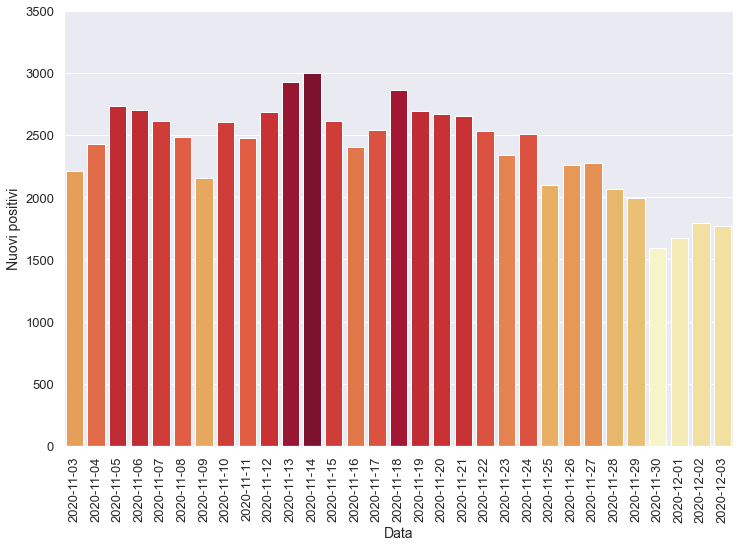

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

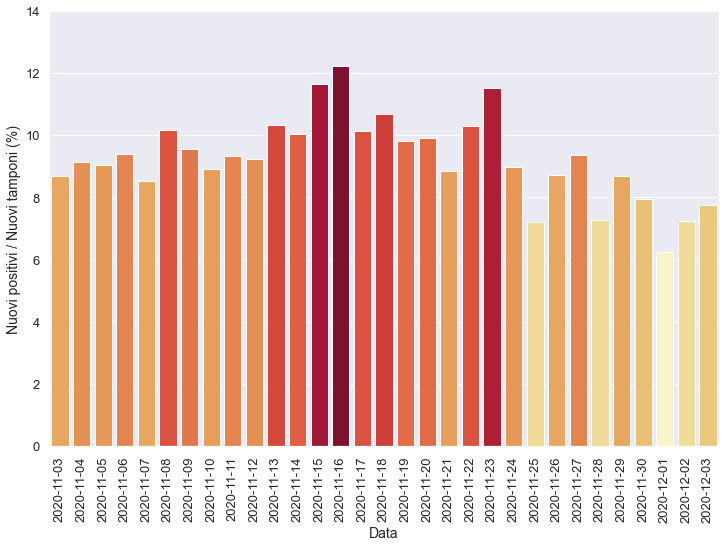

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

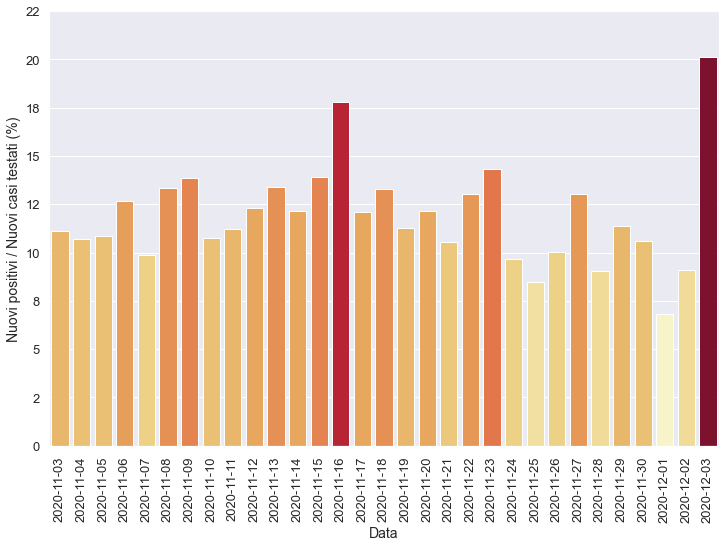

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

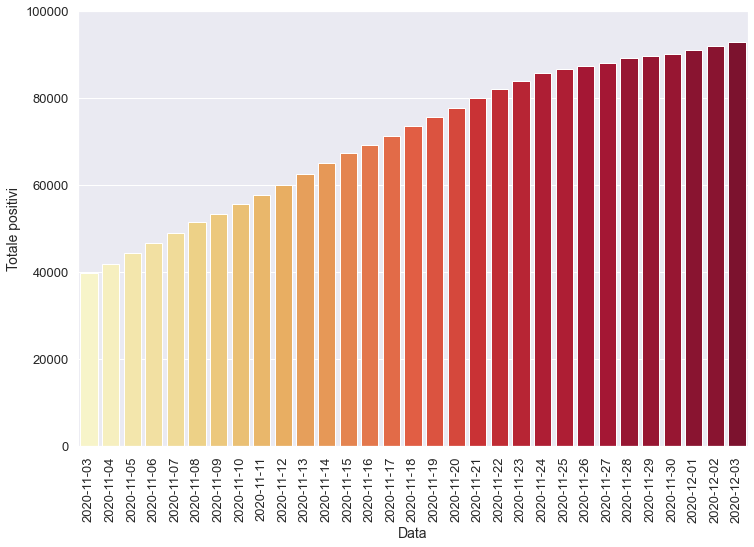

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

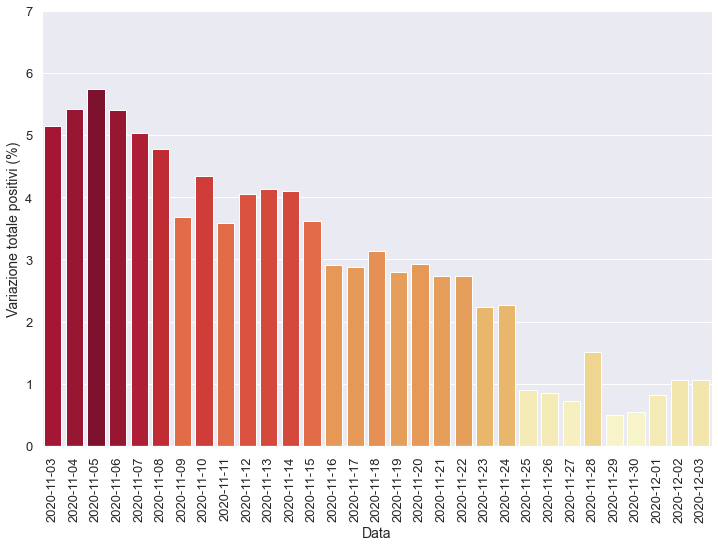

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

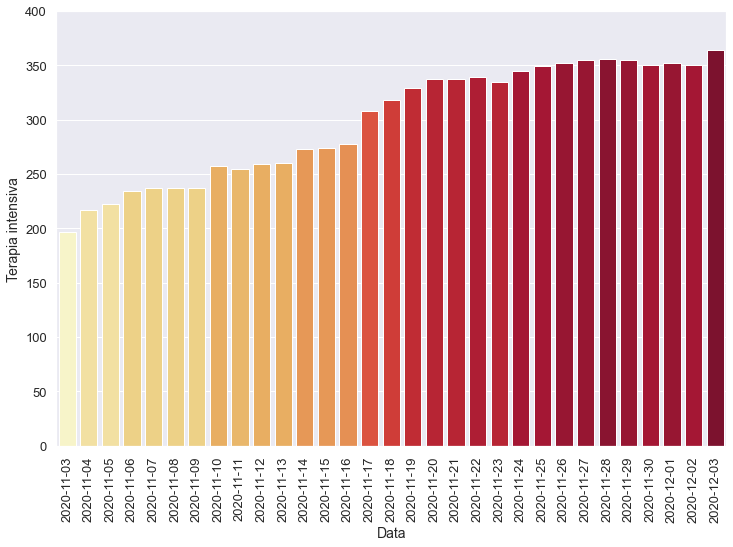

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

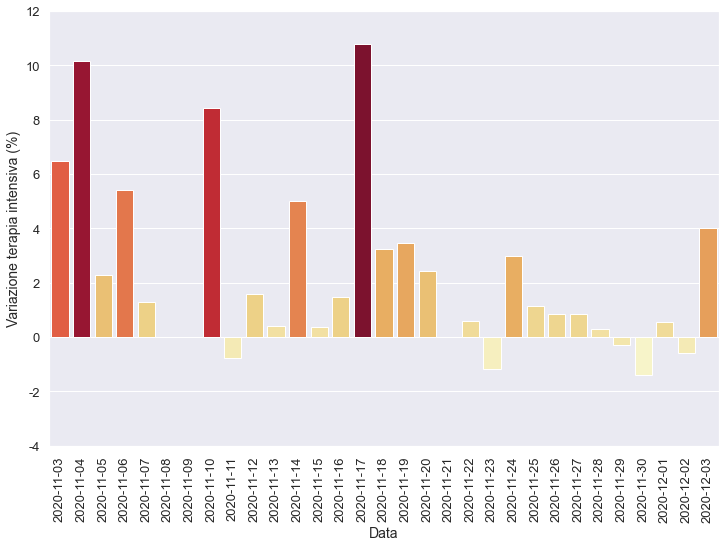

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

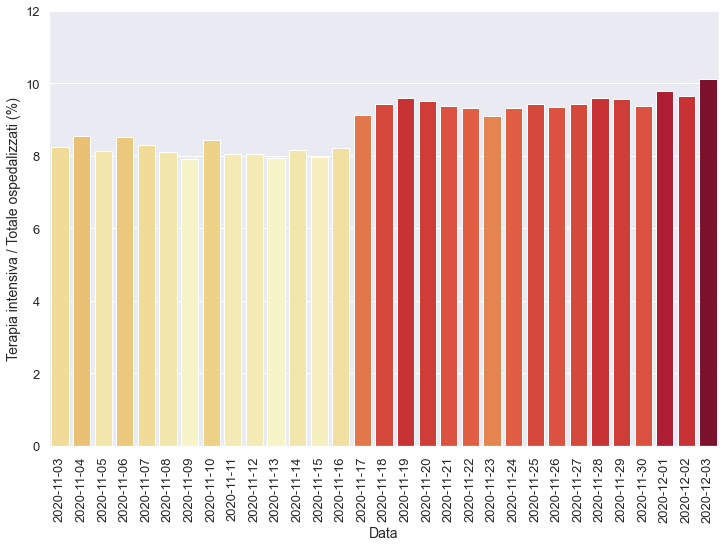

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

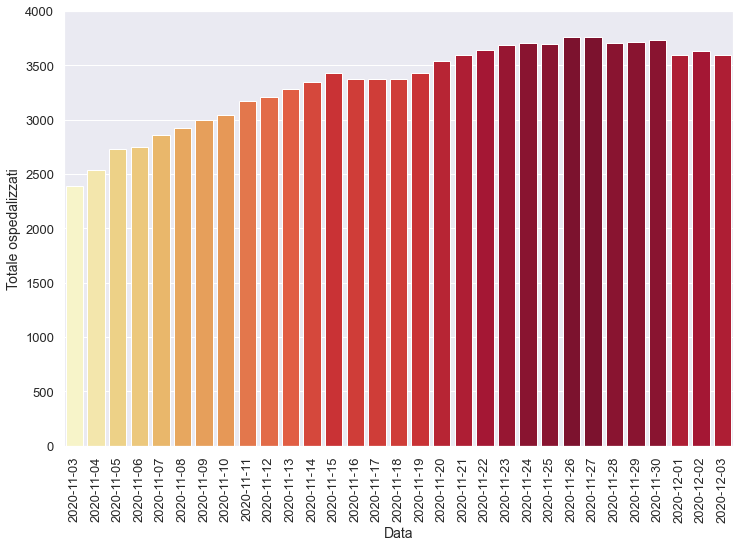

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

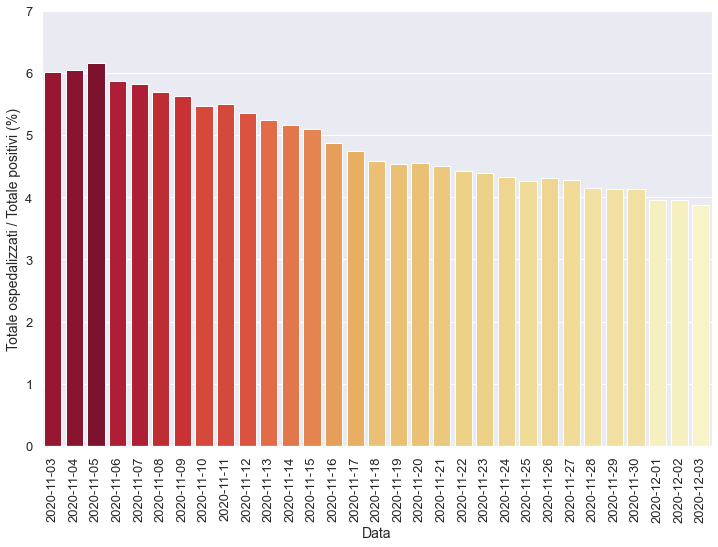

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

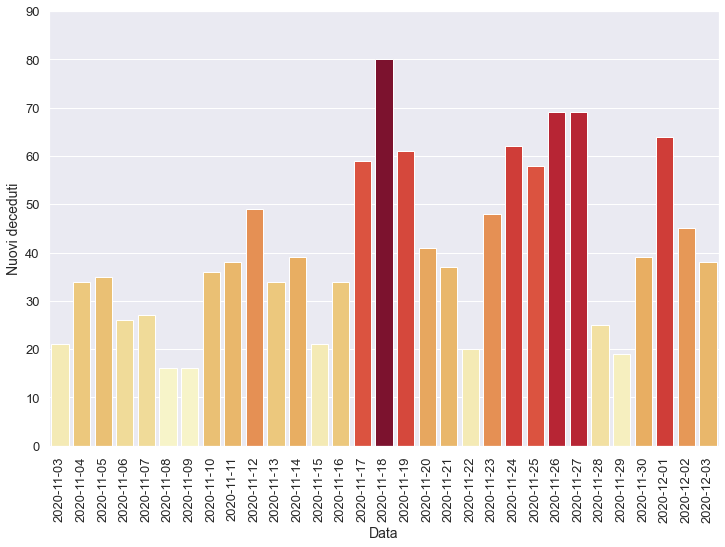

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

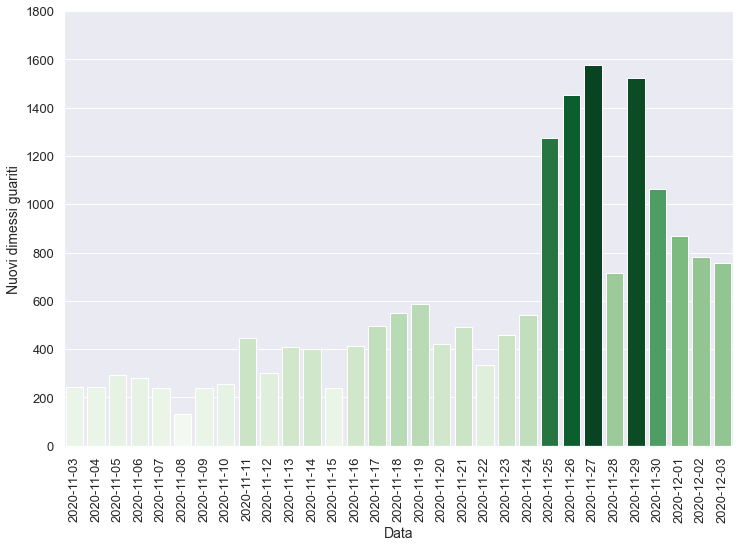

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-26T17:00:00,12,Lazio,3408,352,3760,83543,87303,738,2260,...,69.0,25908.0,22511.0,675.0,9.36,4.31,8.72,10.04,0.86,0.85
1,2020-11-27T17:00:00,12,Lazio,3407,355,3762,84172,87934,631,2276,...,69.0,24296.0,17458.0,629.0,9.44,4.28,9.37,13.04,0.85,0.72
2,2020-11-28T17:00:00,12,Lazio,3352,356,3708,85554,89262,1328,2070,...,25.0,28493.0,22951.0,1382.0,9.60,4.15,7.26,9.02,0.28,1.51
3,2020-11-29T17:00:00,12,Lazio,3358,355,3713,85999,89712,450,1993,...,19.0,22913.0,17511.0,445.0,9.56,4.14,8.70,11.38,-0.28,0.50
4,2020-11-30T17:00:00,12,Lazio,3384,350,3734,86467,90201,489,1589,...,39.0,20008.0,15023.0,468.0,9.37,4.14,7.94,10.58,-1.41,0.55
5,2020-12-01T17:00:00,12,Lazio,3241,352,3593,87345,90938,737,1669,...,64.0,26784.0,24538.0,878.0,9.80,3.95,6.23,6.80,0.57,0.82
6,2020-12-02T17:00:00,12,Lazio,3282,350,3632,88272,91904,966,1791,...,45.0,24689.0,19646.0,927.0,9.64,3.95,7.25,9.12,-0.57,1.06
7,2020-12-03T17:00:00,12,Lazio,3233,364,3597,89282,92879,975,1769,...,38.0,22793.0,8800.0,1010.0,10.12,3.87,7.76,20.10,4.00,1.06


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

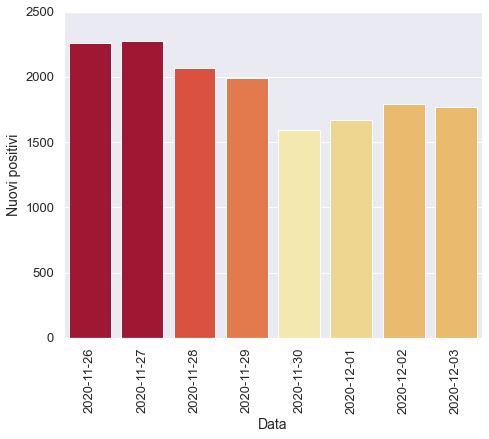

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

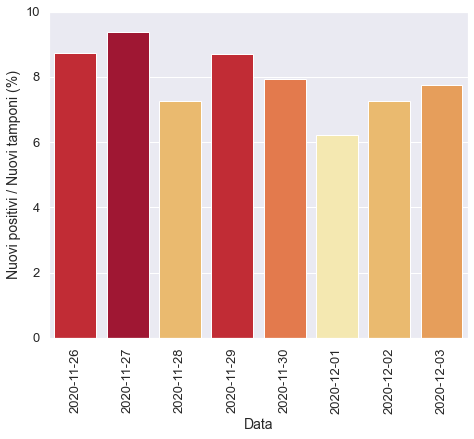

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

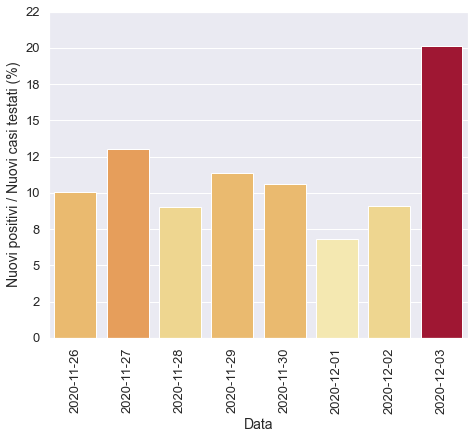

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

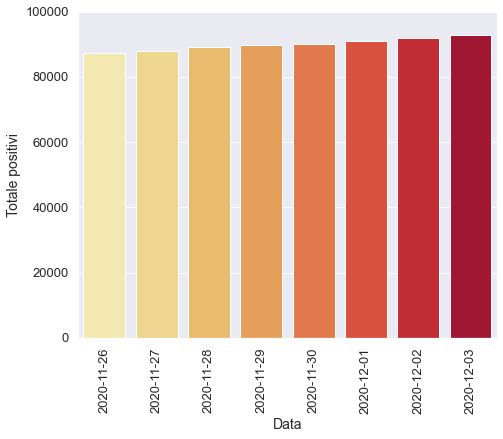

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

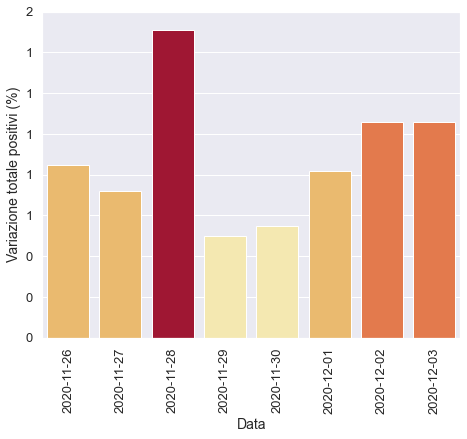

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

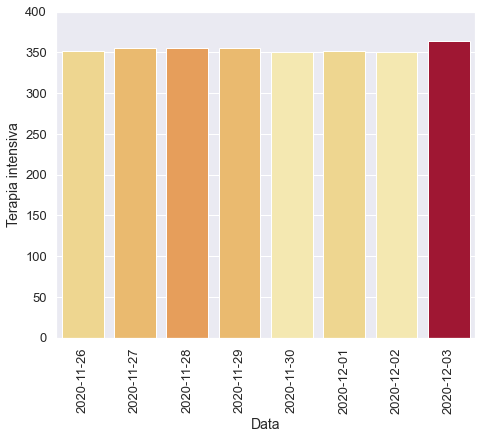

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

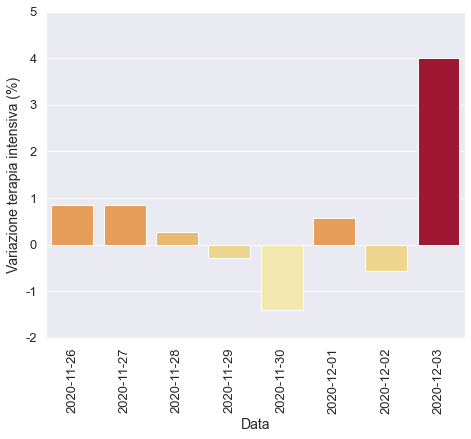

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

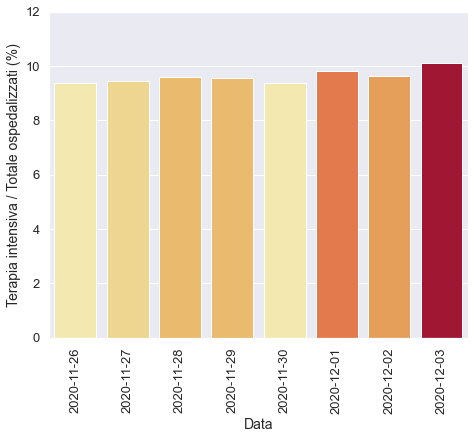

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

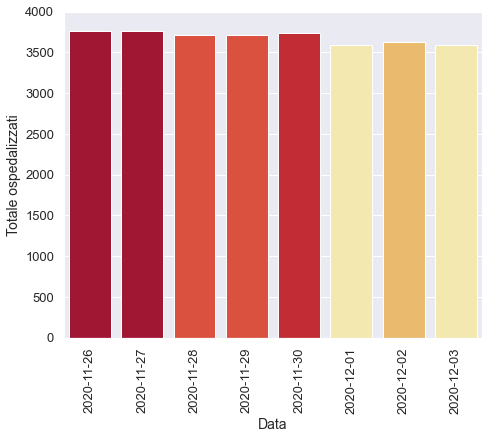

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

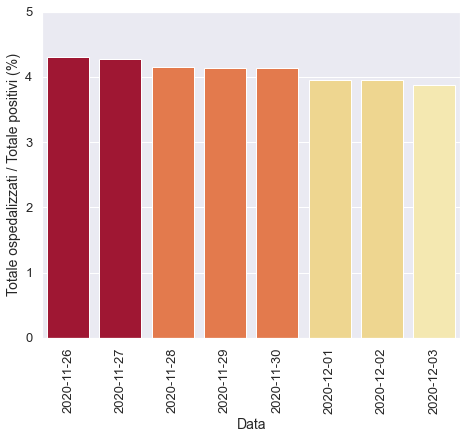

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

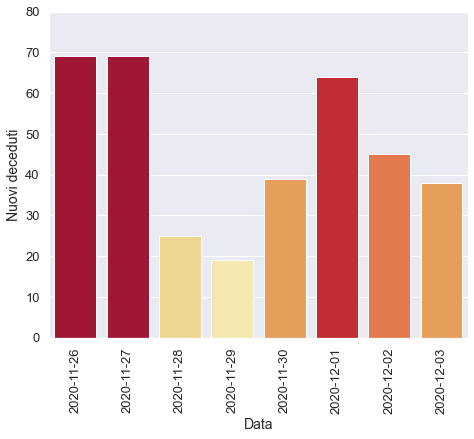

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

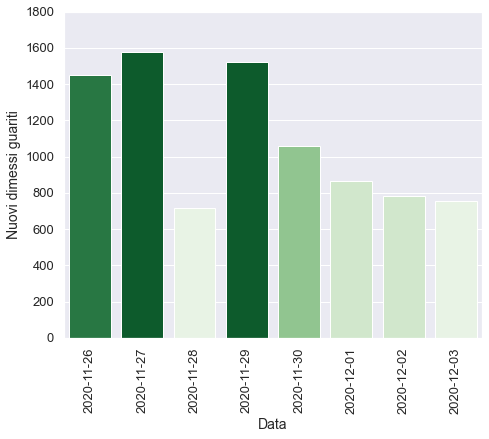

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)